In [4]:
# TFD: https://github.com/hycis/lisa_emotiw/blob/master/emotiw/common/datasets/faces/tfd.py 
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import sys, glob, os
from scipy import io as sio

In [5]:
tfd_48x48 = sio.loadmat("TFD_48x48.mat")
images = tfd_48x48["images"]
labels = tfd_48x48['labs_ex']
labs_id = tfd_48x48['labs_id']
folds = tfd_48x48['folds']

mapping = sio.loadmat("TFD_info.mat")
imfiles = [x[0].encode('ascii', 'ignore') for x in mapping["tfd_info"]["imfiles"][0, 0].flatten()]
dsetnames = [x[0].encode('ascii', 'ignore') for x in mapping["tfd_info"]["dsetnames"][0, 0].flatten()]

|              | `labs_id`     | `labs_ex`          |
| -------------|:-------------:| :-----------------:|
| Meaning      | Subject id    | Facial expressions |
| Value        | 964           | 7                  |

* number of neutral faces: 98362 (determined by labs_id = -1)
* number of subject ids: 963 (labs_id != -1)

In [34]:
labs_id_list = labs_id.tolist()
labs_id_list = [item[0] for item in labs_id_list]
labs_id_set = set(labs_id_list)

major_labs_id = [] # subject with more than 10 images
for item in labs_id_set:
    if item != -1:
        idx = np.where(labs_id == item)[0]
        if len(idx) >= 10:
            major_labs_id.append(item)
    
print(len(major_labs_id))

131


In [35]:
np.random.seed(0)
np.random.shuffle(major_labs_id)

In [39]:
train_labs_id = major_labs_id[:100]
test_labs_id = major_labs_id[100:]
train_idx = []
test_idx = []
train_subject_idx = []
test_subject_idx = []
for item in train_labs_id:
    idx_ = np.where(labs_id == item)[0].tolist()
    train_idx += idx_
    train_subject_idx += [item] * len(idx_)

for item in test_labs_id:
    idx_ = np.where(labs_id == item)[0].tolist()
    test_idx += idx_
    test_subject_idx += [item] * len(idx_)
    
print('[TRAIN] number of subjects = %d, number of images = %d'%(len(train_labs_id), len(train_idx)))
print('[TEST] number of subjects = %d, number of images = %d'%(len(test_labs_id), len(test_idx)))

[TRAIN] number of subjects = 100, number of images = 1348
[TEST] number of subjects = 31, number of images = 451


In [118]:
def construct_data(data_idx, subject_idx, unique_flag=False):
    X = []
    Y = []
    subject_idx_arr = np.asarray(subject_idx)
    subject_idx_set = set(subject_idx)
    for item in subject_idx_set:
        idx = np.where(subject_idx_arr == item)[0].tolist()
        assert len(idx) >= 1
        mean_img = np.zeros((48,48))
        for j in idx:
            img = images[data_idx[j]]
            Y += [img.flatten()]
            mean_img += img 
        mean_img = mean_img / len(idx)
        if unique_flag:
            X += [mean_img.flatten()]
        else:
            X += [mean_img.flatten()] * len(idx)
    return np.asarray(X) / 255., np.asarray(Y) / 255.

In [119]:
X_train, Y_train = construct_data(train_idx, train_subject_idx)
X_test, Y_test = construct_data(test_idx, test_subject_idx)
X_test_unique, _ = construct_data(test_idx, test_subject_idx, unique_flag=True)

In [120]:
np.save('/home/thanhnt/nn/pib/data/TFD/facial_expr_X_train', X_train)
np.save('/home/thanhnt/nn/pib/data/TFD/facial_expr_Y_train', Y_train)
np.save('/home/thanhnt/nn/pib/data/TFD/facial_expr_X_test', X_test)
np.save('/home/thanhnt/nn/pib/data/TFD/facial_expr_Y_test', Y_test)
np.save('/home/thanhnt/nn/pib/data/TFD/', X_test_unique)

In [121]:
arr = np.load('/home/thanhnt/nn/pib/data/TFD/facial_expr_X_train.npy')

In [125]:
X_train.shape

y_var = np.var(Y_train, axis=0)

In [128]:
y_var.shape

(2304,)

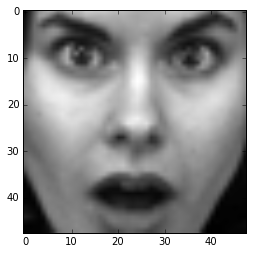

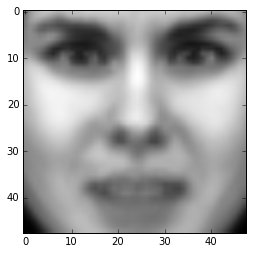

In [123]:
idx = 19
img = np.reshape(Y_train[idx], (48,48))
plt.imshow(img, cmap='gray')
plt.show()

img = np.reshape(X_train[idx], (48,48))
plt.imshow(img, cmap='gray')
plt.show()

In [91]:
emotionsDic = { 1: "Angry", 2 : "Disgust", 3: "Fear" , 4: "Happy", 5: "Sad", 6: "Surprise", 7: "Neutral"}
# 'surprise', 'annoyed', 'shock', 'sad', 'neutral', 'happy', 'disgust', 'angry'